In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 
import astropy.constants as ac
import astropy.units as u

In [2]:
from math import sqrt

def direct_radius(a):
    Radius = sqrt((4*a**2*10**-4)/(0.32))
    
    return Radius

def direct_semiamp(r):
    amp = sqrt((0.32*r**2)/(4*10**-4))
    
    return amp

In [3]:
tab = astropy.io.ascii.read("PS_2023.01.28_19.18.04.csv")

In [4]:
sma_arr = 10.0**(np.arange(7)-2) * u.AU
sma_arr2 = 10.0**(np.arange(5)-0)
## Not sure about this
#period_arr2 = np.sqrt(4*(np.pi**2)*sma_arr2**3/(ac.G*0.5*u.solMass))
period_arr = (10.0**(np.arange(11)-2)) * u.day
m_p_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * np.sqrt(sma_arr / ac.G / (0.5 * u.solMass))
m_pp_arr = 0.5 * u.meter / u.second * 0.5 * u.solMass * ((ac.G * 0.5 * u.solMass) / (4*(np.pi)**2))**(1/6) * (period_arr)**(1/3) / np.sqrt(ac.G * 0.5 * u.solMass)

Imaging_radius = np.sqrt((4*(sma_arr2**2)*(10**-4))/(0.32))

transit_pr = (0.623*u.earthRad)*(period_arr / u.day)**(1/6)
transit_sma = (0.623*u.earthRad)*((np.sqrt(4*(np.pi**2)*sma_arr**3/(ac.G*0.5*u.solMass))/u.day))**(1/6)

In [5]:
print(len(m_p_arr))
print(m_pp_arr)
print(sma_arr)
print(period_arr)

7
[9.06612028e+01 1.95323640e+02 4.20812027e+02 9.06612028e+02
 1.95323640e+03 4.20812027e+03 9.06612028e+03 1.95323640e+04
 4.20812027e+04 9.06612028e+04 1.95323640e+05] d(1/3) kg(1/3) solMass(2/3) / s(1/3)
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04] AU
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07
 1.e+08] d


In [6]:
transit_period = []
transit_axis = []
transit_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Transit":
        transit_period.append(item)
        transit_axis.append(tab["pl_orbsmax"][n])
        transit_mass.append(tab["pl_bmasse"][n])

transit_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Transit":
        transit_radius.append(item)
        
rv_period = []
rv_axis = []
rv_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Radial Velocity":
        rv_period.append(item)
        rv_axis.append(tab["pl_orbsmax"][n])
        rv_mass.append(tab["pl_bmasse"][n])

rv_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Radial Velocity":
        rv_radius.append(item)
        
image_period = []
image_axis = []
image_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Imaging":
        image_period.append(item)
        image_axis.append(tab["pl_orbsmax"][n])
        image_mass.append(tab["pl_bmasse"][n])

image_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Imaging":
        image_radius.append(item)
        
micro_period = []
micro_axis = []
micro_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Microlensing":
        micro_period.append(item)
        micro_axis.append(tab["pl_orbsmax"][n])
        micro_mass.append(tab["pl_bmasse"][n])

micro_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Microlensing":
        micro_radius.append(item)
        
astro_period = []
astro_axis = []
astro_mass = []
for n,item in enumerate(tab["pl_orbper"]):
    if tab["discoverymethod"][n] == "Astrometry":
        astro_period.append(item)
        astro_axis.append(tab["pl_orbsmax"][n])
        astro_mass.append(tab["pl_bmasse"][n])

astro_radius = []
for n,item in enumerate(tab["pl_rade"]):
    if tab["discoverymethod"][n] == "Astrometry":
        astro_radius.append(item)

In [7]:
# Data on the planets of our Solar System
# Masses are in kilograms, times 10 to the 24th power
# Radii (equitorial) are in kilometers
# Orbital periods are in days
# Distance from the Sun (semimajor axis) is in AU (astronomical units)
# Average temperatures are in Kelvin

planet_data = {
    "Mercury": {"mass":0.33011,"radius":2439.7,"orbital period":88,"semimajor axis":0.387,"average temperature":440.15},
    "Venus": {"mass":4.8675,"radius":6051.8,"orbital period":225,"semimajor axis":0.723,"average temperature":737.15},
    "Earth": {"mass":5.9724,"radius":6378.137,"orbital period":365,"semimajor axis":1,"average temperature":288.15},
    "Mars": {"mass":0.64171,"radius":3396.2,"orbital period":687,"semimajor axis":1.524,"average temperature":208.15},
    "Jupiter": {"mass":1898.19,"radius":71492,"orbital period":4333,"semimajor axis":5.204,"average temperature":163.15},
    "Saturn": {"mass":568.34,"radius":60268,"orbital period":10756,"semimajor axis":9.583,"average temperature":133.15},
    "Uranus": {"mass":86.813,"radius":25559,"orbital period":30667,"semimajor axis":19.201,"average temperature":78.15},
    "Neptune": {"mass":102.413,"radius":24764,"orbital period":60190,"semimajor axis":30.048,"average temperature":73.15},}

In [8]:
# Creating a list of the masses of each planet.
all_radius = []
Earthrad = planet_data["Earth"]["radius"]

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_radius.append(planet["radius"]/Earthrad)

In [9]:
# Creating a list of the semimajor axes of each planet.
all_period = []

# Run through all the dictionary values, and extract the semimajor axis of each planet, appending it to our list.

for planet in planet_data.values():
        all_period.append(planet["orbital period"])

In [10]:
# Creating a list of the distances of each planet.
all_distances = []

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_distances.append(planet["semimajor axis"])

In [11]:
# Creating a list of the masses of each planet.
all_mass = []
Earthmass = planet_data["Earth"]["mass"]

# Run through all the dictionary values, and extract the mass 
# of each planet from the list.

for planet in planet_data.values():
        all_mass.append(planet["mass"]/Earthmass)

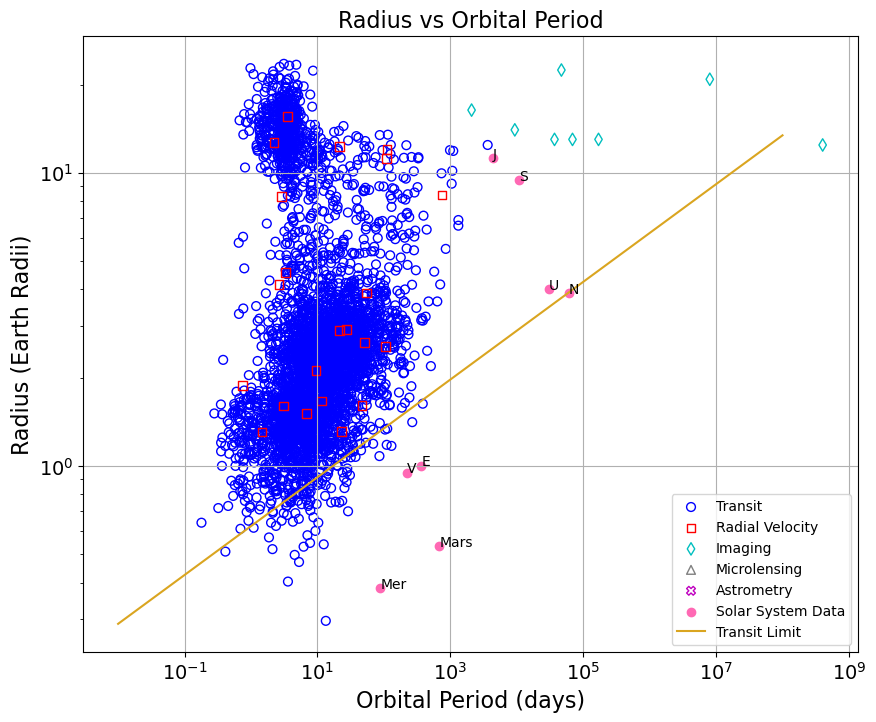

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_period, transit_radius, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_period, rv_radius, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_period, image_radius, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_period, micro_radius, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_period, astro_radius, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_period, all_radius, label="Solar System Data",facecolors='hotpink')
plt.plot(period_arr.value, transit_pr.decompose().to(u.earthRad), label="Transit Limit",color="goldenrod")
## VERY IFFY
#plt.plot(period_arr2, Imaging_radius/u.earthRad, label="Direct Imaging Limit",color="darkseagreen")
plt.annotate("Mer", (all_period[0], all_radius[0]))
plt.annotate("V", (all_period[1], all_radius[1]))
plt.annotate("E", (all_period[2], all_radius[2]))
plt.annotate("Mars", ( all_period[3], all_radius[3]))
plt.annotate("J", (all_period[4], all_radius[4]))
plt.annotate("S", (all_period[5], all_radius[5]))
plt.annotate("U", (all_period[6], all_radius[6]))
plt.annotate("N", (all_period[7], all_radius[7]))
plt.xscale("log")
plt.yscale("log")
# Setting plot limits
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Orbital Period (days)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius vs Orbital Period", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
fig.savefig('RadiusOrb.png', bbox_inches='tight')

In [14]:
print(all_distances)
print(all_radius)

[0.387, 0.723, 1, 1.524, 5.204, 9.583, 19.201, 30.048]
[0.3825098143862385, 0.9488350595165956, 1.0, 0.5324752353234181, 11.208915706890586, 9.44915419659377, 4.007283004425901, 3.882638456966353]


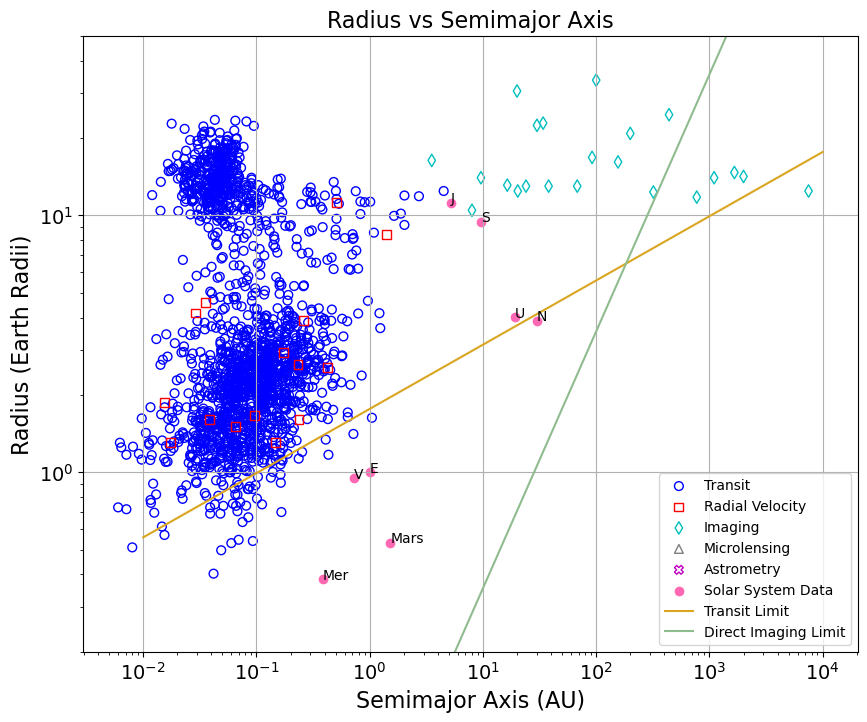

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_axis, transit_radius, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_axis, rv_radius, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_axis, image_radius, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_axis, micro_radius, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_axis, astro_radius, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_distances, all_radius, label="Solar System Data",facecolors='hotpink')
# ADDED LIMIT
plt.plot(sma_arr.value, transit_sma.decompose().to(u.earthRad), label="Transit Limit",color="goldenrod")
plt.plot(sma_arr2, Imaging_radius/u.earthRad, label="Direct Imaging Limit",color="darkseagreen")
plt.annotate("Mer", (all_distances[0], all_radius[0]))
plt.annotate("V", (all_distances[1], all_radius[1]))
plt.annotate("E", (all_distances[2], all_radius[2]))
plt.annotate("Mars", ( all_distances[3], all_radius[3]))
plt.annotate("J", (all_distances[4], all_radius[4]))
plt.annotate("S", (all_distances[5], all_radius[5]))
plt.annotate("U", (all_distances[6], all_radius[6]))
plt.annotate("N", (all_distances[7], all_radius[7]))
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Semimajor Axis (AU)", fontsize=16)
ax.set_ylabel("Radius (Earth Radii)", fontsize=16)
ax.set_title("Radius vs Semimajor Axis", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
fig.savefig('RadiusDistance.png', bbox_inches='tight')

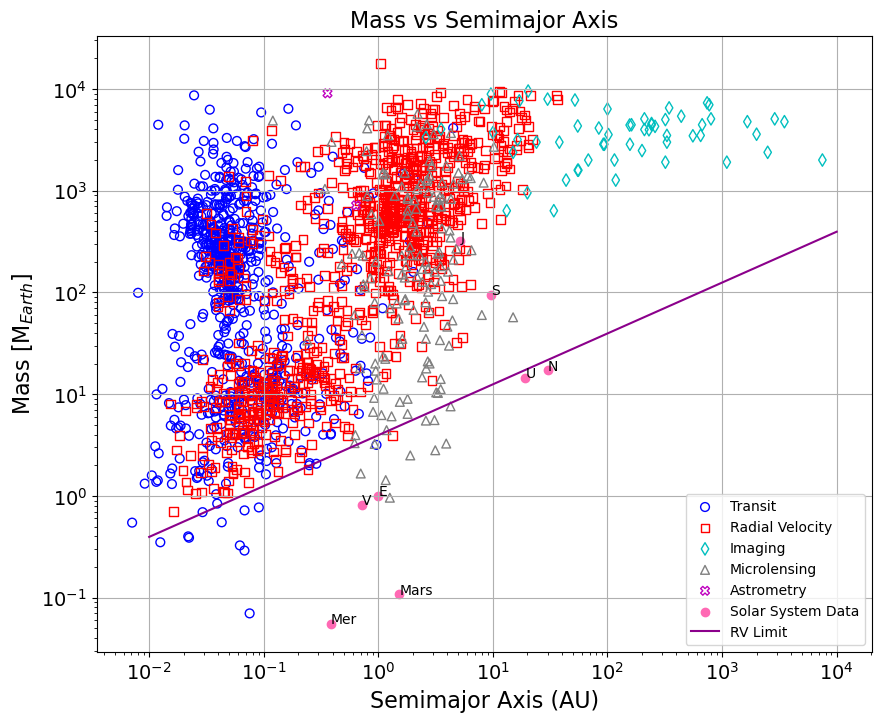

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
x, step = np.linspace(0,10**4, num=101, endpoint=True, retstep=True)
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_axis, transit_mass, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_axis, rv_mass, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_axis, image_mass, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_axis, micro_mass, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_axis, astro_mass, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_distances, all_mass, label="Solar System Data",facecolors='hotpink')
plt.plot(sma_arr.value, m_p_arr.decompose().to(u.earthMass), label="RV Limit",color="darkmagenta")
plt.annotate("Mer", (all_distances[0], all_mass[0]))
plt.annotate("V", (all_distances[1], all_mass[1]))
plt.annotate("E", (all_distances[2], all_mass[2]))
plt.annotate("Mars", ( all_distances[3], all_mass[3]))
plt.annotate("J", (all_distances[4], all_mass[4]))
plt.annotate("S", (all_distances[5], all_mass[5]))
plt.annotate("U", (all_distances[6], all_mass[6]))
plt.annotate("N", (all_distances[7], all_mass[7]))
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Semimajor Axis (AU)", fontsize=16)
ax.set_ylabel("Mass [M$_{Earth}$]", fontsize=16)
ax.set_title("Mass vs Semimajor Axis", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
fig.savefig('MassAxis.png', bbox_inches='tight')

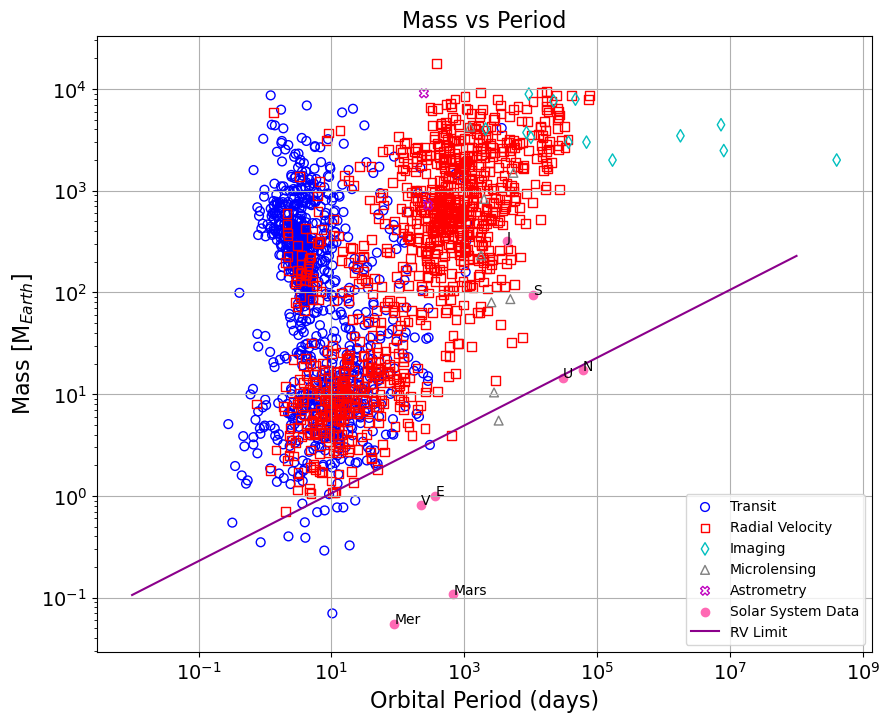

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
# Plotting both data sets with labels and markers
plt.grid()
plt.scatter(transit_period, transit_mass, label="Transit",s=40,facecolors='none', edgecolors='b')
plt.scatter(rv_period, rv_mass, label="Radial Velocity",s=40,facecolors='none', edgecolors='r',marker='s')
plt.scatter(image_period, image_mass, label="Imaging",s=40,facecolors='none', edgecolors='c',marker='d')
plt.scatter(micro_period, micro_mass, label="Microlensing",s=40,facecolors='none', edgecolors='gray',marker='^')
plt.scatter(astro_period, astro_mass, label="Astrometry",s=40,facecolors='none', edgecolors='m',marker='X')
plt.scatter(all_period, all_mass, label="Solar System Data",facecolors='hotpink')
plt.plot(period_arr.value, m_pp_arr.decompose().to(u.earthMass), label="RV Limit",color='darkmagenta')
plt.annotate("Mer", (all_period[0], all_mass[0]))
plt.annotate("V", (all_period[1], all_mass[1]))
plt.annotate("E", (all_period[2], all_mass[2]))
plt.annotate("Mars", ( all_period[3], all_mass[3]))
plt.annotate("J", (all_period[4], all_mass[4]))
plt.annotate("S", (all_period[5], all_mass[5]))
plt.annotate("U", (all_period[6], all_mass[6]))
plt.annotate("N", (all_period[7], all_mass[7]))
# Setting plot limits
plt.xscale("log")
plt.yscale("log")
#ax.set_xlim(0.1, 100)
#ax.set_ylim(0.2, 50)
#Setting labels
ax.set_xlabel("Orbital Period (days)", fontsize=16)
ax.set_ylabel("Mass [M$_{Earth}$]", fontsize=16)
ax.set_title("Mass vs Period", fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.legend()
plt.show()
fig.savefig('MassPeriod.png', bbox_inches='tight')